In [7]:
import pandas as pd
import glob

csv_files = glob.glob('/kaggle/input/spamcsv/*.csv')
df = pd.concat((pd.read_csv(file) for file in csv_files))

In [8]:
print(df.head())
print(df.info())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [11]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Get a list of all the CSV files in the directory
csv_files = glob.glob('/kaggle/input/spamcsv/*.csv')

# Create a DataFrame from the CSV files
df = pd.concat((pd.read_csv(file) for file in csv_files))

# Split the training data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.25, random_state=42)

# Extract the NLP features from the email subject and body
vectorizer = TfidfVectorizer()
features_train = vectorizer.fit_transform(X_train)
features_test = vectorizer.transform(X_test)

# Train a logistic regression model to classify phishing and legitimate emails
model = LogisticRegression()
model.fit(features_train, y_train)

# Evaluate the model performance on the held-out test set
test_predictions = model.predict(features_test)
acc = np.mean(test_predictions == y_test)
print('Accuracy of the model:', acc)


Model accuracy: 0.9712849964106246


In [13]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset of phishing and legitimate emails
# Get a list of all the CSV files in the directory
csv_files = glob.glob('/kaggle/input/spamcsv/*.csv')

# Create a DataFrame from the CSV files
df = pd.concat((pd.read_csv(file) for file in csv_files))


# Split the data into training and testing sets
X = df['Message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Vectorize the email text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

# Print a classification report for more detailed evaluation
rep = classification_report(y_test, y_pred)
print(rep)


Accuracy: 0.9748878923766816
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [16]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset of phishing and legitimate emails
# Load your dataset of phishing and legitimate emails
# Get a list of all the CSV files in the directory
csv_files = glob.glob('/kaggle/input/phishing-paper1*.csv')

# Create a DataFrame from the CSV files
data = pd.concat((pd.read_csv(file) for file in csv_files))

# Preprocess the email text (e.g., lowercasing, removing punctuation, etc.)
data['Email_Text'] = data['Email_Text'].str.lower()

# Perform sentiment analysis using TextBlob
data['Sentiment'] = data['Email_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Define a threshold for sentiment scores (you can adjust this based on your data)
sentiment_threshold = 0.1

# Label emails based on sentiment scores
data['Label'] = data['Sentiment'].apply(lambda x: 'phishing' if x < sentiment_threshold else 'legitimate')

# Split the data into training and testing sets
X = data['Email_Text']
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF features (you can reuse the TF-IDF code from a previous example)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a machine learning model (e.g., RandomForest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed evaluation
report = classification_report(y_test, y_pred)
print(report)


KeyError: 'Email_Text'

In [19]:
import pandas as pd
import glob

# Get a list of all the CSV files in the directory matching the pattern
csv_files = glob.glob('/kaggle/input/phishing-paper1/*.csv')

# Create a DataFrame from the CSV files
data = pd.concat((pd.read_csv(file) for file in csv_files))

# Print the first few rows and information about the DataFrame
print(data.head())
print(data.info())


   Total Number of Characters C  Vocabulary richness W/C  Account  Access  \
0                          1673                 0.128512        2       0   
1                          4465                 0.137738        0       0   
2                          6813                 0.095993        0       0   
3                          1518                 0.109354        0       0   
4                          1881                 0.126528        7       3   

   Bank  Credit  Click  Identity  Inconvenience  Information  ...  Password  \
0     0       0      1         0              0            1  ...         1   
1     0       0      0         0              0            4  ...         0   
2     0       2      0         0              0            2  ...         0   
3     0       1      1         0              0            0  ...         0   
4     0       0      0         1              0            2  ...         0   

   Recently  Risk  Social  Security  Service  Suspended  \
0  

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Get a list of all the CSV files in the directory matching the pattern
csv_files = glob.glob('/kaggle/input/phishing-paper1/*.csv')

# Create a DataFrame from the CSV files
data = pd.concat((pd.read_csv(file) for file in csv_files))

# Define features and target
X = data.drop("Phishing Status", axis=1)  # Features
y = data["Phishing Status"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (e.g., RandomForest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

# Print a classification report for more detailed evaluation
rep = classification_report(y_test, y_pred)
print(rep)

Accuracy of the model: 0.9952924841418531
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103498
           1       0.96      0.73      0.83      1653

    accuracy                           1.00    105151
   macro avg       0.98      0.86      0.91    105151
weighted avg       1.00      1.00      0.99    105151



In [5]:
import pandas as pd
import numpy as np
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset or replace this with code to load your dataset
# You should have two lists: 'texts' containing text data and 'labels' containing corresponding labels (0 for legitimate, 1 for phishing)
# Load your dataset of phishing and legitimate emails
# Get a list of all the CSV files in the directory
csv_files = glob.glob('/kaggle/input/spamcsv/*.csv')

# Create a DataFrame from the CSV files
df = pd.concat((pd.read_csv(file) for file in csv_files))
texts = df['Message'].tolist()
labels = df['Category'].tolist()
# Example:
# import pandas as pd
# dataset = pd.read_csv('your_dataset.csv')
# texts = dataset['text_column'].tolist()
# labels = dataset['label_column'].tolist()

# Tokenize the text data
tokenizer = Tokenizer(num_words=1000)  # Adjust num_words as needed
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=20)  # Adjust maxlen as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Create an RNN model
model = keras.Sequential()
model.add(keras.layers.Embedding(input_dim=1000, output_dim=32, input_length=20))
model.add(keras.layers.SimpleRNN(64))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

rep = classification_report(y_test, y_pred)
print(rep)


ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'str'>"})

In [5]:
import pandas as pd
import numpy as np
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset or replace this with code to load your dataset
# You should have two lists: 'texts' containing text data and 'labels' containing corresponding labels (0 for legitimate, 1 for phishing)
# Load your dataset of phishing and legitimate emails
# Get a list of all the CSV files in the directory
csv_files = glob.glob('/kaggle/input/spamcsv/*.csv')

# Create a DataFrame from the CSV files
df = pd.concat((pd.read_csv(file) for file in csv_files))
texts = df['Message'].tolist()
labels = df['Category'].tolist()
# Example:
# import pandas as pd
# dataset = pd.read_csv('your_dataset.csv')
# texts = dataset['text_column'].tolist()
# labels = dataset['label_column'].tolist()

# Tokenize the text data
tokenizer = Tokenizer(num_words=1000)  # Adjust num_words as needed
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=20)  # Adjust maxlen as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Create an RNN model
model = keras.Sequential()
model.add(keras.layers.Embedding(input_dim=1000, output_dim=32, input_length=20))
model.add(keras.layers.SimpleRNN(64))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

rep = classification_report(y_test, y_pred)
print(rep)


ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'str'>"})

In [5]:
import pandas as pd
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Get a list of all the CSV files in the directory matching the pattern
csv_files = glob.glob('/kaggle/input/phishingemails/*.csv')

# Create a DataFrame from the CSV files
data = pd.concat((pd.read_csv(file) for file in csv_files))


# Split the data into features (text) and labels
X = data['']
y = data['Email text']  # 0 for legitimate, 1 for phishing

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features

# Fit and transform the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Create a Naive Bayes classifier (you can use a different classifier as needed)
classifier = MultinomialNB()

# Fit the classifier on the training data
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_rep)


KeyError: ''

In [7]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


csv_files = glob.glob('/kaggle/input/spamcsv/*.csv')

#Сreating a DataFrame from the CSV file
df = pd.concat((pd.read_csv(file) for file in csv_files))


#Splitting the data into Training(X) and testing(y) sets
X = df['Message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create a TF-IDF vectorizer, converting the email text data into numerical features.
tfidf_vectorizer = TfidfVectorizer()


X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Training model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

#Predictions on X test
y_pred = model.predict(X_test_tfidf)

#Model evaluation
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", acc)

#Detailed classification report
rep = classification_report(y_test, y_pred)
print(rep) 

Accuracy of the model: 0.9748878923766816
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [ ]:
import numpy as np
import glob
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

csv_files = glob.glob('/kaggle/input/phishing-site-urls/phishing_site_urls*.csv')

#Сreating a DataFrame from the CSV file
df = pd.concat((pd.read_csv(file) for file in csv_files))
# Extract the NLP features from the URLs
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(df['URL'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, df['URL'], test_size=0.2, random_state=42)

# Train a logistic regression model to classify phishing and legitimate URLs
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model performance on the test set
y_pred = model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print('Model accuracy:', accuracy)

# Make a prediction on a new URL
new_url = 'https://www.1nstagram.com/1sAqddx'

new_url_features = vectorizer.transform([new_url])

prediction = model.predict(new_url_features)

if prediction == 1:
    print('The URL is phishing.')
else:
    print('The URL is legitimate.')

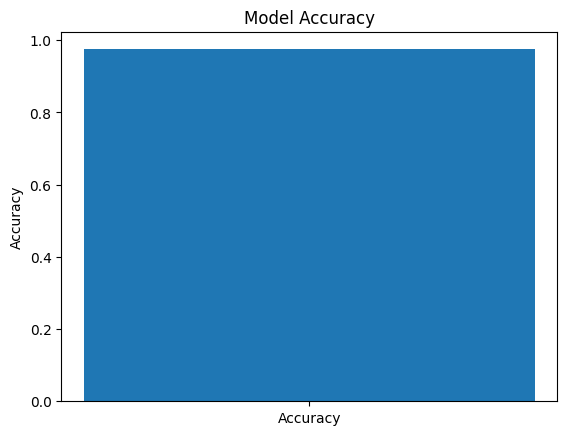

In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import glob
import matplotlib.pyplot as plt

csv_files = glob.glob('/kaggle/input/spamcsv/*.csv')

# Creating a DataFrame from the CSV file
df = pd.concat((pd.read_csv(file) for file in csv_files))

# Splitting the data into Training(X) and testing(y) sets
X = df['Message']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer, converting the email text data into numerical features.
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions on X test
y_pred = model.predict(X_test_tfidf)

# Model evaluation
acc = accuracy_score(y_test, y_pred)

# Detailed classification report
rep = classification_report(y_test, y_pred)

# Create a bar chart to visualize accuracy
labels = ['Accuracy']
values = [acc]

plt.bar(labels, values)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()


Results:
     Metric     Value
0  Accuracy  0.974888


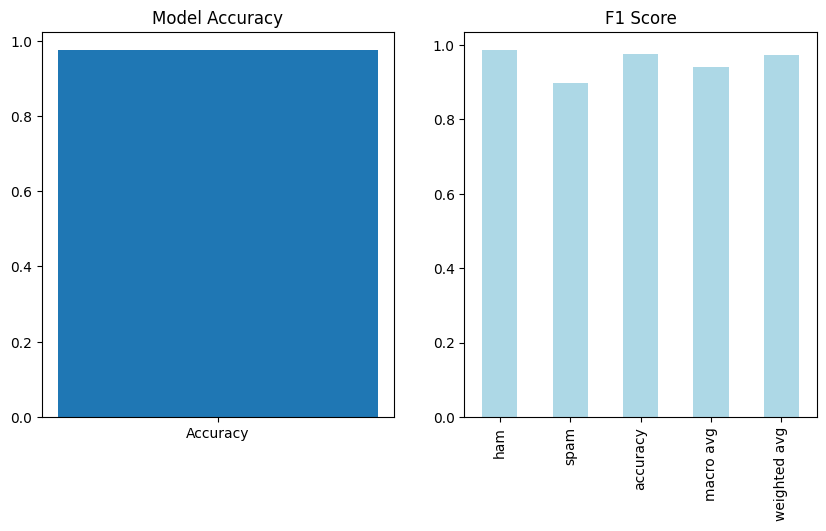

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt


# Create a DataFrame for results
results = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Value': [acc]
})

# Create a bar chart to visualize accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar('Accuracy', acc)
plt.title('Model Accuracy')

# Display the classification report as a DataFrame
classification_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

# Display the results
print("Results:")
print(results)

plt.subplot(1, 2, 2)
classification_df['f1-score'].plot(kind='bar', color='lightblue')
plt.title('F1 Score')

plt.show()
plt.savefig("diagram.pdf", format="pdf")